# Report on the Iris Dataset

## Main Objectives and Data Summary

Our unsupervised model will be focusing on **clustering** for the Iris Dataset. This set contains 150 records under four attributes  —  petal length, petal width, sepal length, sepal width, and three iris classes: setosa, virginica and versicolor. 
This type of analysis will allow us to make predictions: We feed the 4 features to the unsupervised algorithm and it will predict which class the iris belongs to.

## Brief Data Exploration, Cleaning and Feature Engineering

We'll use sklearn to load the dataset and matplotlib for data visualisation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import datasets
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Here we have the target variable ‘Type’. We need to remove the target variable so that this dataset can be used to work in an unsupervised learning environment. The iloc function is used to get the features we require. We also use .values function to get an array of the dataset.

In this Iris dataset, we have three classes. We visualise these classes in a 2-D graph. This will help us in comparing the original classes with the clusters created by the different clustering algorithms. We use the following code to plot the original dataset and visualise the three type of flowers on a graph.

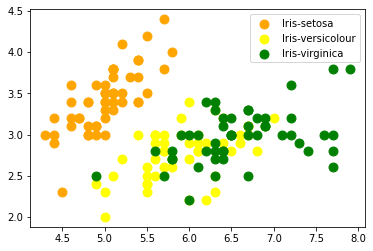

In [2]:
iris_X = iris_data.iloc[:, [0, 1, 2,3]].values

iris_Y = iris_data['Type']
iris_Y = np.array(iris_Y)

plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

## Model Training

We will be using 3 different clustering techniques: K-means clustering, DBSCAN and Agglomerative clustering

### K-means Clustering
First we have to find the optimal number of clusters which we can find through Elbow Analysis:

Text(0, 0.5, 'WCSS')

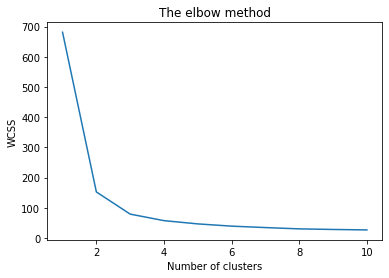

In [3]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

We see that at the number of clusters = 3, WCSS is less than 100, which is good for us. So we take k =3.

In [4]:
cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(iris_X)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In the above output we got value labels: ‘0’, ‘1’  and ‘2’. For a better understanding, we can visualize these clusters.

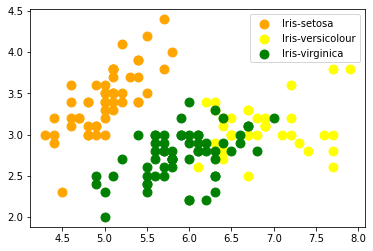

In [5]:
plt.scatter(iris_X[pred_kmeans == 0, 0], iris_X[pred_kmeans == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred_kmeans == 1, 0], iris_X[pred_kmeans == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred_kmeans == 2, 0], iris_X[pred_kmeans == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

When compared to the original classes we find that the observations of the class label Iris-setosa has been correctly formed into a separate well-defined cluster, however, for the other two classes, clusters are not as correct. This is mainly because, in the original dataset, these two class labels were overlapping each other which makes it difficult for the clustering algorithm as it works best for clear neat separate observations. Still, the clusters have been formed more or less correctly.

### DBSCAN


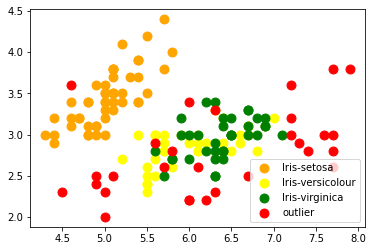

In [6]:
from sklearn.cluster import DBSCAN
clt_DB = DBSCAN()
clt_DB = DBSCAN(eps=0.42)
clt_DB
model_dbscan = clt_DB.fit(iris_X)
pred_dbscan = model_dbscan.labels_
pred_dbscan

plt.scatter(iris_X[pred_dbscan == 0, 0], iris_X[pred_dbscan == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred_dbscan == 1, 0], iris_X[pred_dbscan == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred_dbscan == 2, 0], iris_X[pred_dbscan == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
plt.scatter(iris_X[pred_dbscan == -1, 0], iris_X[pred_dbscan == -1, 1], s = 80, c = 'red', label = 'outlier')
plt.legend()

We find that by using DB Scan some observations are marked as outliers.

### Agglomerative Clustering


Text(0, 0.5, 'Euclidean distance in the space with other variables')

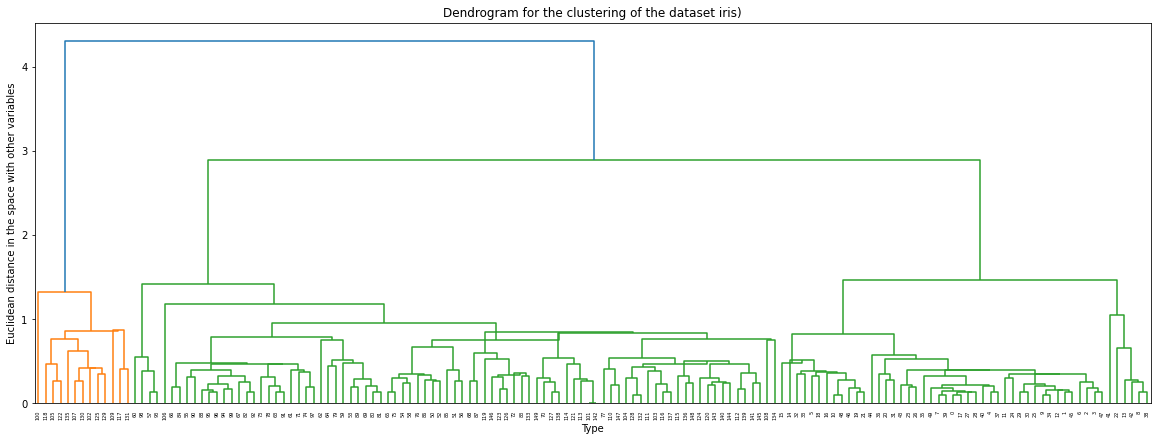

In [7]:
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch

iris_X = iris_data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

# plot dendrogram
Z = sch.linkage(iris_X, method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset iris)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

This dendrogram helps us decide on the number of clusters: 3

In [8]:
cluster_H = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [9]:
model_clt = cluster_H.fit(iris_X)
model_clt

AgglomerativeClustering(n_clusters=3)

In [10]:
pred1 = model_clt.labels_
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [11]:
iris_X = iris_X.values

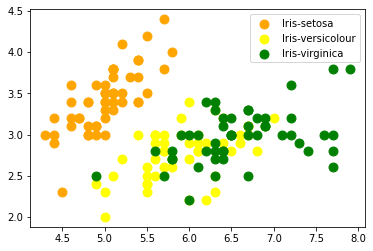

In [12]:
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

Here also we found that Iris-setosa has been clearly formed into separate cluster while the other clusters overlap each other.

## Summary

K-means clustering results in 1 well formed cluster however due to overlap of versicolor and virginica data the other 2 classes have poorly formed clusters.

DBSCAN makes us aware of outliers which is useful but we have the same issues as with K-means with the clusters formed.

**Agglomerative clustering** seems to perform best despite some overlap issues.

## Next Steps

For a better analysis, we can now remove the outliers found (through DBSCAN) as well as obtain more data that avoids the overlap between iris-versicolor and iris-virginica